# Bank Customer Churn
Customer Churn refers to the percentage of customers that stop using a business's products or services over a specific period of time due to several factors. It is extremely crucial to satisfy customers and keep them coming back to your organization since acquiring new customers is a costlier process than maintaining the regular ones. This problem of customer attrition (churn) can be solved or atleast minimized by gap analysis and making informed datadriven decisions.

<center><img src ="https://img.freepik.com/free-vector/profitable-partnership-business-partners-cowork_335657-3010.jpg?w=1380&t=st=1716188381~exp=1716188981~hmac=6dcf6da2f188f0a4f32835a90c63e5c736dfff98d34a8b487dc4ea0ca740a7c5" width="600"></center>

In this section I have gone through a **bank's customer data** for churn. As in most cases of analysis we need to define the problem statement first so we can have the purpose of analysis in our minds throughout. In this session I analyse the dataset to find the factors that could be mostly responsible for making the customers leave and finding out what are the bank services that quite don't meet customer satisfaction. 

Before getting analysing to find relations and patterns we need to first completely understand the dataset, the attributes (column labels), observations (row values) and prepare and process it for the next steps.

 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option("display.precision", 3)

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Attribute Descriptions

* **RowNumber:** Index numbers
* **CustomerId:** Contains random values and has no effect on customer leaving the bank.
* **Surname:** The surname of a customer has no impact on their decision to leave the bank.
* **CreditScore:** Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* **Geography:** A customer’s location can affect their decision to leave the bank.
* **Gender:** It’s interesting to explore whether gender plays a role in a customer leaving the bank.
* **Age:** This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* **Tenure:** Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* **Balance:** Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* **NumOfProducts:** Refers to the number of products that a customer has purchased through the bank.
* **HasCrCard:** Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* **IsActiveMember:** Active customers are less likely to leave the bank.
* **EstimatedSalary:** As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* **Exited:** Whether or not the customer left the bank.
* **Complain:** Customer has complaint or not.
* **Satisfaction Score:** Score provided by the customer for their complaint resolution.
* **Card Type:** type of card hold by the customer.
* **Points Earned:** The points earned by the customer for using credit card.

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

It is crucial to check if the data has any null values. We can already see it above after using df.info

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

We do not require the **CustomerId** as it has nothing to do with churn so we are better of removing it from our file

In [6]:
# It is cruicial to mention axis=1 to specify we are removing from the columns, where axis=0 refers to rows
df = df.drop('CustomerId', axis=1)

In [7]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


We can use the `describe` method to get basic statistical characteristics of each numerical feature number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [8]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204,0.204,3.014,606.515
std,2886.896,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403,0.403,1.406,225.925
min,1.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000,0.000,1.000,119.000
25%,2500.750,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000,0.000,2.000,410.000
50%,5000.500,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000,0.000,3.000,605.000
75%,7500.250,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000,0.000,4.000,801.000
max,10000.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000,1.000,5.000,1000.000


We know the attribute **Exited** state 1 for churned and 0 for not churned. We can analyse the number of total churned customers using`value_counts`. We can use `normalize=True` to calculate proportions.

In [9]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [10]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.796
1    0.204
Name: proportion, dtype: float64

20.4% churn rate is actually quite bad for an organisation. It can adversly affect the functioning of the bank and can even make it go bankrupt.

It will be a good idea to analyse the attributes based on the condition of `churn==0` and `churn==1` to check any noticeable differences

In [11]:
df[df["Exited"]==0].describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,7962.000,7962.000,7962.000,7962.000,7962.000,7962.000,7962.000,7962.000,7962.000,7962.0,7962.000,7962.000,7962.000
mean,5024.073,651.838,37.408,5.033,72742.751,1.544,0.707,0.555,99726.853,0.0,0.001,3.018,607.044
std,2891.330,95.650,10.126,2.880,62851.577,0.510,0.455,0.497,57399.957,0.0,0.035,1.408,226.092
min,2.000,405.000,18.000,0.000,0.000,1.000,0.000,0.000,90.070,0.0,0.000,1.000,119.000
25%,2526.250,585.000,31.000,3.000,0.000,1.000,0.000,0.000,50783.295,0.0,0.000,2.000,412.000
50%,5041.500,653.000,36.000,5.000,92063.060,2.000,1.000,1.000,99620.355,0.0,0.000,3.000,603.000
75%,7524.750,718.000,41.000,7.000,126419.330,2.000,1.000,1.000,148602.445,0.0,0.000,4.000,801.000
max,10000.000,850.000,92.000,10.000,221532.800,3.000,1.000,1.000,199992.480,0.0,1.000,5.000,1000.000


In [12]:
df[df["Exited"]==1].describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,2038.000,2038.000,2038.000,2038.000,2038.000,2038.000,2038.000,2038.000,2038.000,2038.0,2038.000,2038.000,2038.000
mean,4908.407,645.415,44.836,4.935,91109.476,1.475,0.699,0.361,101509.909,1.0,0.998,2.998,604.448
std,2868.354,100.337,9.760,2.937,58346.483,0.801,0.459,0.480,57932.623,0.0,0.044,1.399,225.315
min,1.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,1.0,0.000,1.000,163.000
25%,2421.250,578.000,38.000,2.000,38591.222,1.000,0.000,0.000,51924.020,1.0,1.000,2.000,405.000
50%,4875.500,646.000,45.000,5.000,109344.230,1.000,1.000,0.000,102489.335,1.0,1.000,3.000,610.500
75%,7419.750,716.000,51.000,8.000,131423.637,2.000,1.000,1.000,152443.857,1.0,1.000,4.000,793.000
max,9999.000,850.000,84.000,10.000,250898.090,4.000,1.000,1.000,199808.100,1.0,1.000,5.000,1000.000


# Summary Tables

Summary tables are great to have a comparative analysis where we can see how the observations in our sample are distributed in context of two variables `Exited` and 'Other Attributes'.

I have constructed summary tables of **Exited** against all other possible attributes that can have an impact on customer churn. For this we can build contingency table using `crosstab` method.

I have used `normalize=True` to have insight on proportions as well. For row-wise proportions use `normalize='index'` insted.
`normalize=True` will give proportions on the whole population whereas `normalize='index'` will give proportions of `Exited == 1` and `Exited == 0`. For column-wise proportions we use `normalize='columns'`.

In [13]:
pd.crosstab(df['Exited'], df['NumOfProducts'])

NumOfProducts,1,2,3,4
Exited,,,,
0,3675,4241,46,0
1,1409,349,220,60


In [14]:
pd.crosstab(df['Exited'], df['NumOfProducts'], normalize='index')

NumOfProducts,1,2,3,4
Exited,,,,
0,0.462,0.533,0.006,0.000
1,0.691,0.171,0.108,0.029


Most of the people that used **3 or more** products had a `churn` rate of **82.3%** and **100%** respectively. This could be due to lack of support or poor product management.




In [15]:
pd.crosstab(df['Exited'], df['NumOfProducts'], normalize='columns')

NumOfProducts,1,2,3,4
Exited,,,,
0,0.723,0.924,0.173,0.0
1,0.277,0.076,0.827,1.0


In [16]:
pd.crosstab(df['Exited'], df['Tenure'])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,770,389
1,95,232,201,213,203,209,196,177,197,214,101


In [17]:
pd.crosstab(df['Exited'], df['Tenure'], normalize='index')

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.040,0.101,0.106,0.100,0.099,0.101,0.097,0.107,0.104,0.097,0.049
1,0.047,0.114,0.099,0.105,0.100,0.103,0.096,0.087,0.097,0.105,0.050


In [18]:
pd.crosstab(df['Exited'], df['Tenure'], normalize='columns')

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.77,0.776,0.808,0.789,0.795,0.793,0.797,0.828,0.808,0.783,0.794
1,0.23,0.224,0.192,0.211,0.205,0.207,0.203,0.172,0.192,0.217,0.206


In [19]:
pd.crosstab(df['Exited'], df['HasCrCard'], normalize='index') 

HasCrCard,0,1
Exited,,
0,0.293,0.707
1,0.301,0.699


In [20]:
pd.crosstab(df['Exited'], df['HasCrCard'], normalize='columns') 

HasCrCard,0,1
Exited,,
0,0.792,0.798
1,0.208,0.202


Customers are more likely to churn if they are not an active member. As we can see below **63.9%** of people that **churned** were not an active member or **85.7%** of people that were active members stayed.

In [21]:
pd.crosstab(df['Exited'], df['IsActiveMember'], normalize='index')

IsActiveMember,0,1
Exited,,
0,0.445,0.555
1,0.639,0.361


In [22]:
pd.crosstab(df['Exited'], df['IsActiveMember'], normalize='columns')

IsActiveMember,0,1
Exited,,
0,0.731,0.857
1,0.269,0.143


In [23]:
pd.crosstab(df['Exited'], df['Complain'], normalize='index')

Complain,0,1
Exited,,
0,0.999,0.001
1,0.002,0.998


In [24]:
pd.crosstab(df['Exited'], df['Complain'], normalize='columns')

Complain,0,1
Exited,,
0,9.995e-01,0.005
1,5.028e-04,0.995


From above contingency table we can clearly see there is poor service or support as **99.8%** of the customers that left had complains or **99.5%** of customers that had complains left. These are extremely high proportions and show us a that somewhat the major issue in churn lies in resolvin the complains of the customer. The organization should consider to answer the questions `How can we minimize customer complains?`, `What are the services or products that receive the most complains?`, `How can we resolve the complains as soon as possible?` amongst others.






In [25]:
pd.crosstab(df['NumOfProducts'], df['Complain'], normalize='index')

Complain,0,1
NumOfProducts,,
1,0.723,0.277
2,0.923,0.077
3,0.173,0.827
4,0.000,1.000


From the above table we see all the customers who had 4 products had a complain and earlier we saw all the people who had 4 products had churned.

In [26]:
pd.crosstab(df['Exited'], df['Geography'], normalize='columns')

Geography,France,Germany,Spain
Exited,,,
0,0.838,0.676,0.833
1,0.162,0.324,0.167


People from Germany were more likely to churn than France or Spain

In [27]:
df.head(3)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


# Visualization


Visualization is a great way of analysis. In the forms of graphs and charts we can spot trends easily and help analysts to get into aa very detailed analysis of the data. It is also a great way of sharing your findings and inferences to the stakeholders, since it is visually appealing, tells a long story in a very short time, easier to explain and easier to grasp.

**Seaborn** and **Matplotlib** amongst others are two very widely used libraries used for data visualization. We can check **Credit Scores, Geography, Age** and other features against **Exited** to spot any trends or correlations. A great way to start our visual analysis would be to calculate the **correlation matrix** and plot a correlation. 

In [28]:
# We need only attrinutes with numerical values
numerical_df = df.select_dtypes(include=['number'])

# Calcuulating the correlation matrix
correlation_matrix = numerical_df.corr()

In [31]:
# Defining the target varibale for correlations
target_variable = 'Exited'

# Dropping the target variable
correlations = correlation_matrix[target_variable].drop(target_variable)

Dropping of the target variable is done because we want the correlation with other features and not with itself. A correlation matrix represents a numerical correlation of each feature with the target variable. It can be either positively correlated or negatively correlated.

In this context correlating a target variable to itself doesn't make sense and won't help derive any inference. It can be left as it is but removing it ensures that we understand what the target varibale is and we are clear about the problem we are trying to solve.

Converting the series obtained into a tabular format is crucial for plotting graphs using libraries like `seaborn` and `matplotlib`.

In [32]:
# Converting the series into a DataFrame with meaningful columns
correlations_df = correlations.reset_index()

In [33]:
correlations_df.columns = ['Attributes', 'Correlations']

In [34]:
correlations_df.head()

,Attributes,Correlations
0,RowNumber,-0.016
1,CreditScore,-0.027
2,Age,0.285
3,Tenure,-0.014
4,Balance,0.119


The first one is a simple visualisation using `seaborn` and `matplotlib`. It demonstartes the same stats as the second one but the second one uses `pyplot` is interactive and adds a bit more functionality for the viewer, such as to be able to zoom in or out etc.

Any of the below ways are okay to go with as long as they meet our requirements and help us draw inferences.

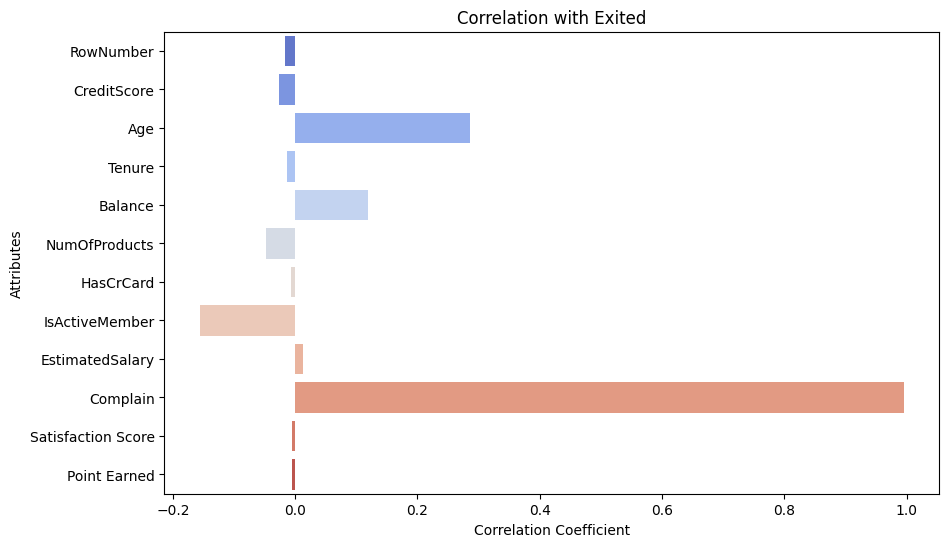

In [35]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlations', y='Attributes', data=correlations_df, palette='coolwarm')
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attributes')
plt.show()

**Age, Balance** and **Complain** are the three most **positively correlated** attributes with **customer churn**. This shows us that these are the most prominent causes behind the customers that tend to leave or exit the organization.

On the other hand **IsActiveMember** is the most **negatively correlated**. This means an active member is the least likely to exit or churn.

In [89]:
# Ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set plot style
sns.set(style="whitegrid")

# Function to plot histograms
def plot_histogram(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=attribute, hue=hue, multiple="stack", palette="coolwarm")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
# Function to plot count plots
def plot_countplot(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=attribute, hue=hue, palette="coolwarm")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

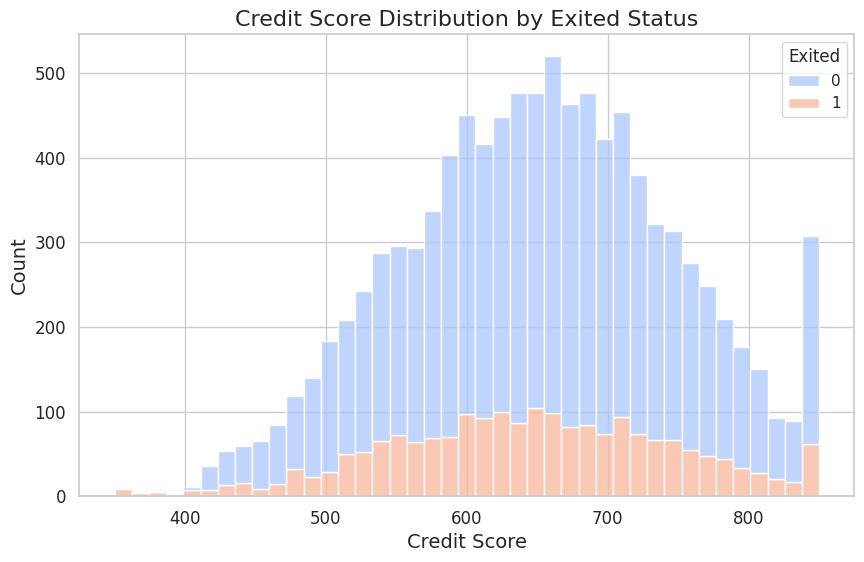

In [90]:
# 1. CreditScore vs Exited
plot_histogram('CreditScore', 'Exited', 'Credit Score Distribution by Exited Status', 'Credit Score', 'Count')

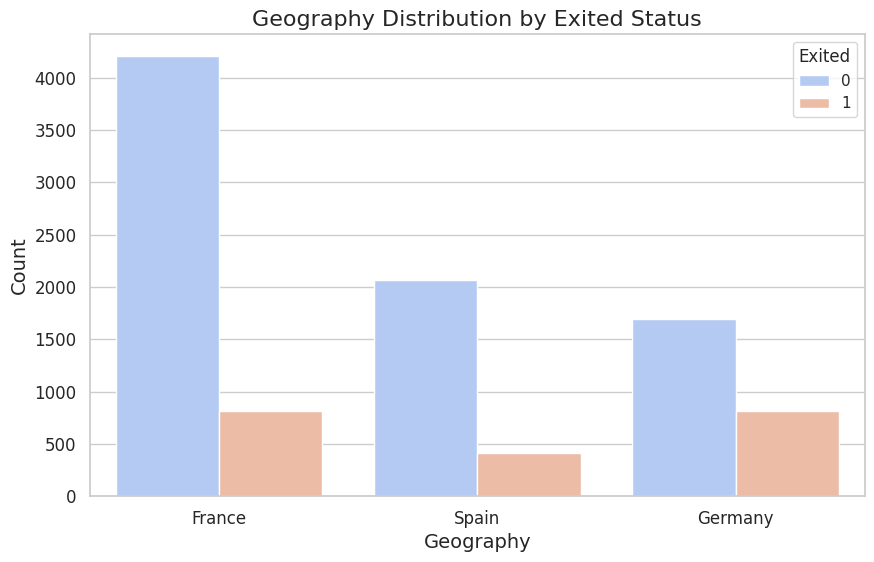

In [66]:
# 2. Geography vs Exited
plot_countplot('Geography', 'Exited', 'Geography Distribution by Exited Status', 'Geography', 'Count')



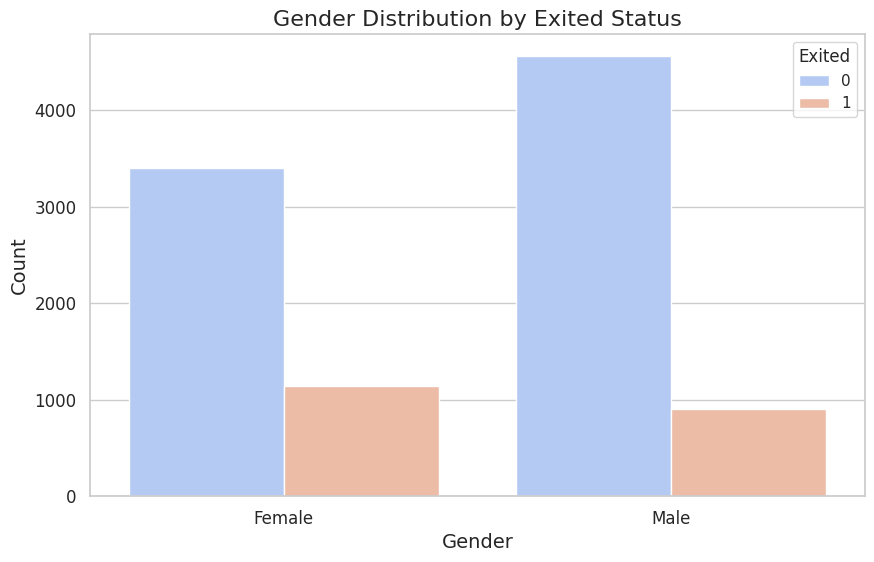

In [67]:
# 3. Gender vs Exited
plot_countplot('Gender', 'Exited', 'Gender Distribution by Exited Status', 'Gender', 'Count')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

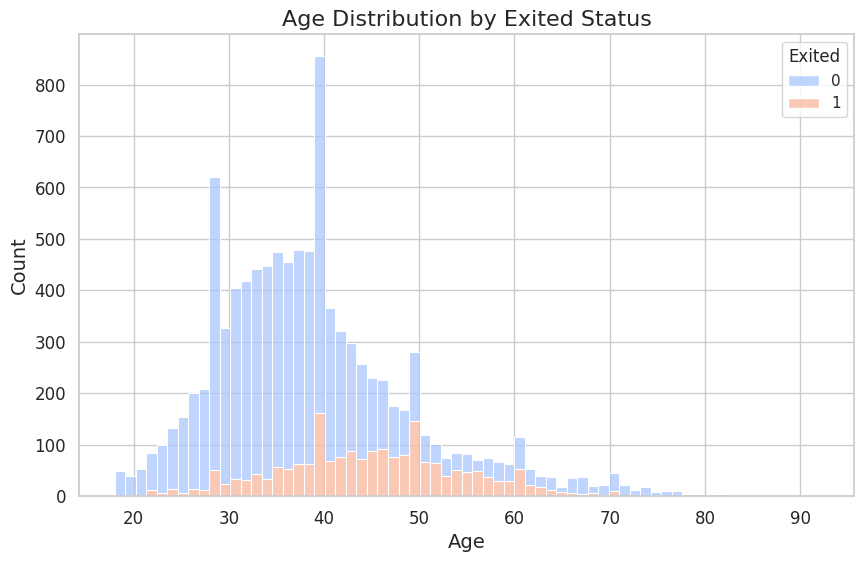

In [68]:
# 4. Age vs Exited
plot_histogram('Age', 'Exited', 'Age Distribution by Exited Status', 'Age', 'Count')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

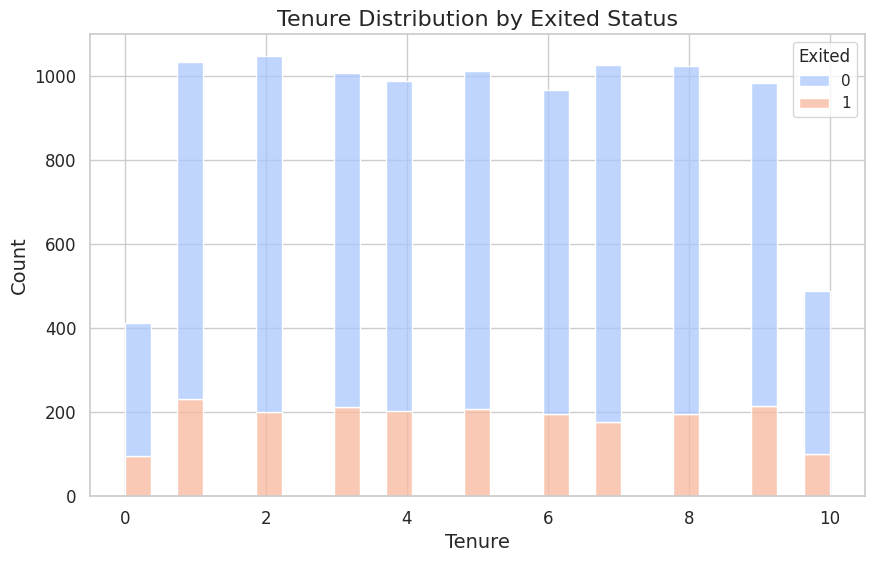

In [69]:
# 5. Tenure vs Exited
plot_histogram('Tenure', 'Exited', 'Tenure Distribution by Exited Status', 'Tenure', 'Count')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

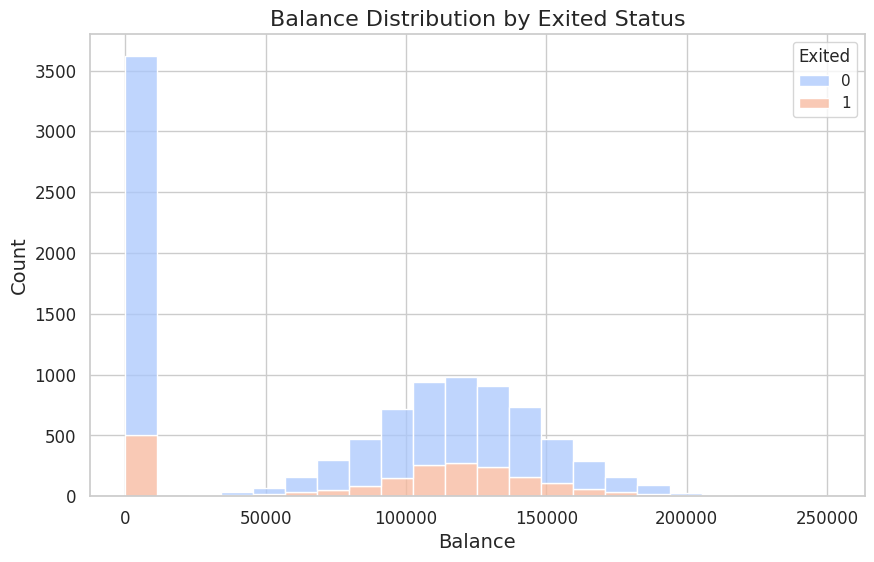

In [70]:
# 6. Balance vs Exited
plot_histogram('Balance', 'Exited', 'Balance Distribution by Exited Status', 'Balance', 'Count')



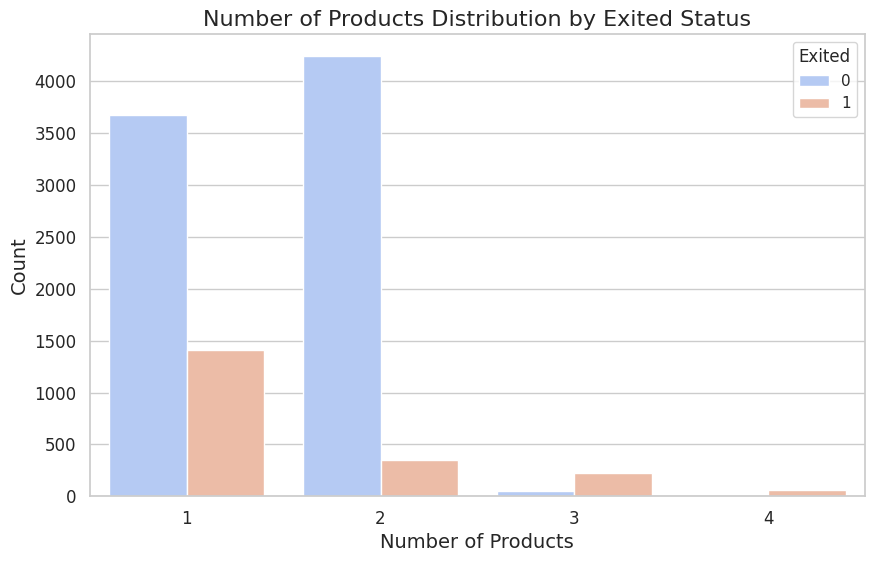

In [47]:
# 7. NumOfProducts vs Exited
plot_countplot('NumOfProducts', 'Exited', 'Number of Products Distribution by Exited Status', 'Number of Products', 'Count')


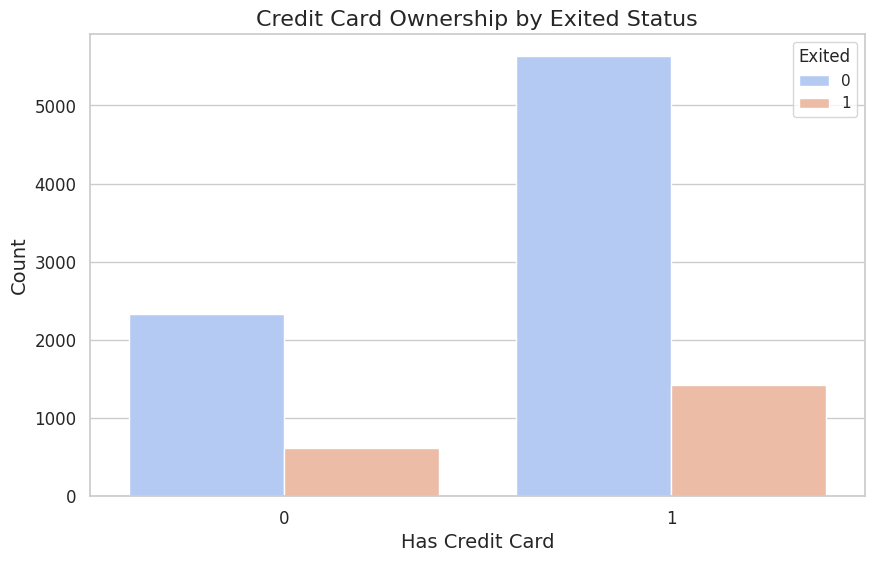

In [48]:

# 8. HasCrCard vs Exited
plot_countplot('HasCrCard', 'Exited', 'Credit Card Ownership by Exited Status', 'Has Credit Card', 'Count')



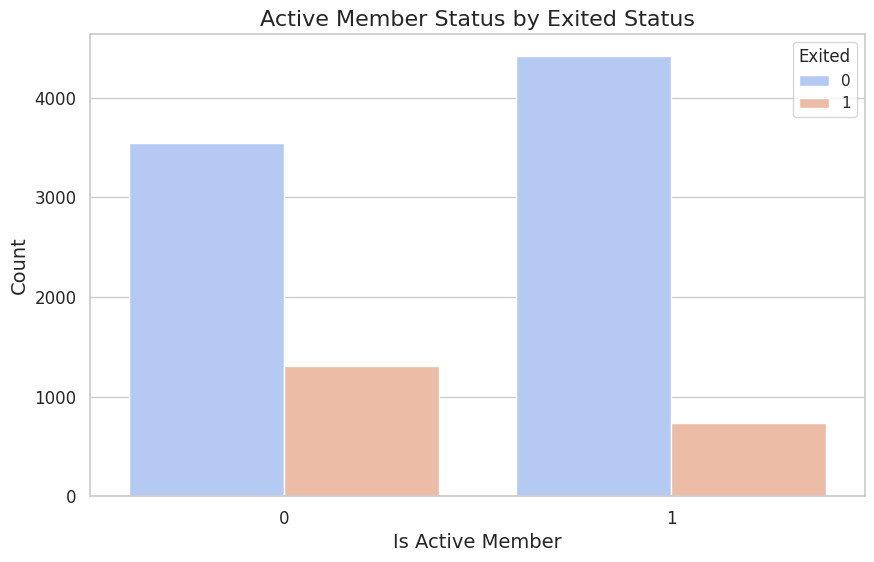

In [49]:
# 9. IsActiveMember vs Exited
plot_countplot('IsActiveMember', 'Exited', 'Active Member Status by Exited Status', 'Is Active Member', 'Count')



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

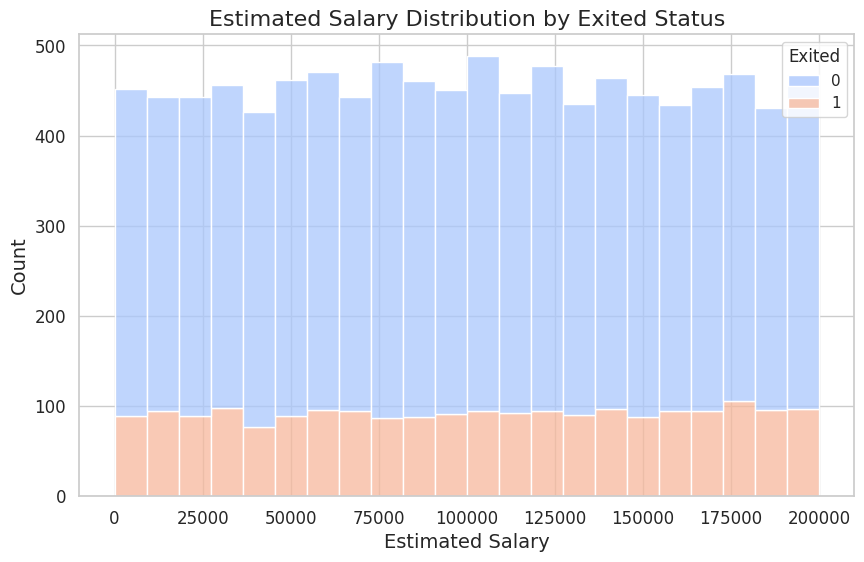

In [59]:
# 10. EstimatedSalary vs Exited
plot_histogram('EstimatedSalary', 'Exited', 'Estimated Salary Distribution by Exited Status', 'Estimated Salary', 'Count')


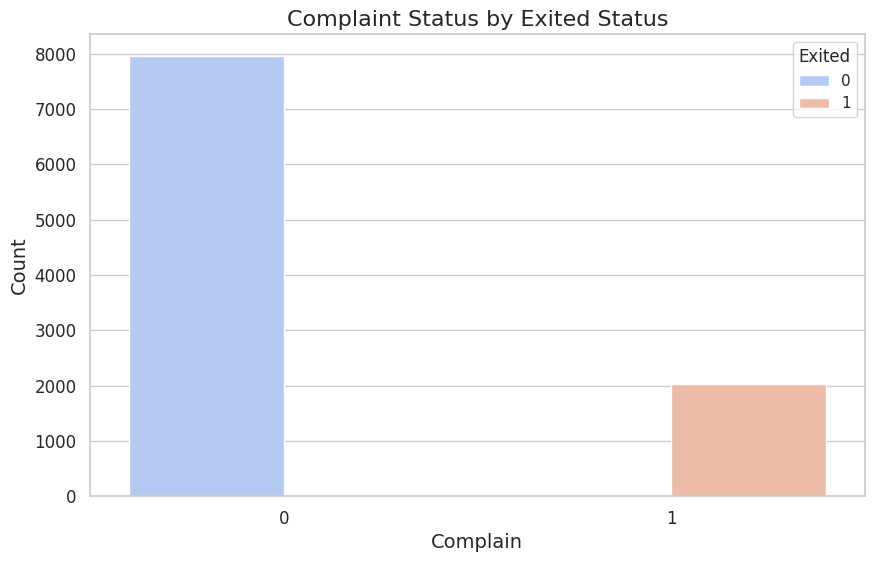

In [51]:

# 11. Complain vs Exited
plot_countplot('Complain', 'Exited', 'Complaint Status by Exited Status', 'Complain', 'Count')



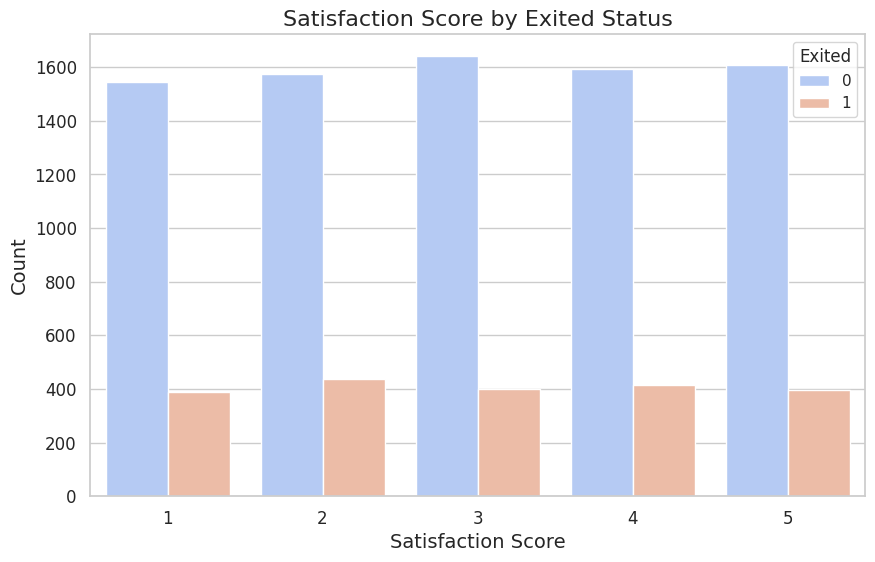

In [55]:
# 12. Satisfaction Score vs Exited
plot_countplot('Satisfaction Score', 'Exited', 'Satisfaction Score by Exited Status', 'Satisfaction Score', 'Count')



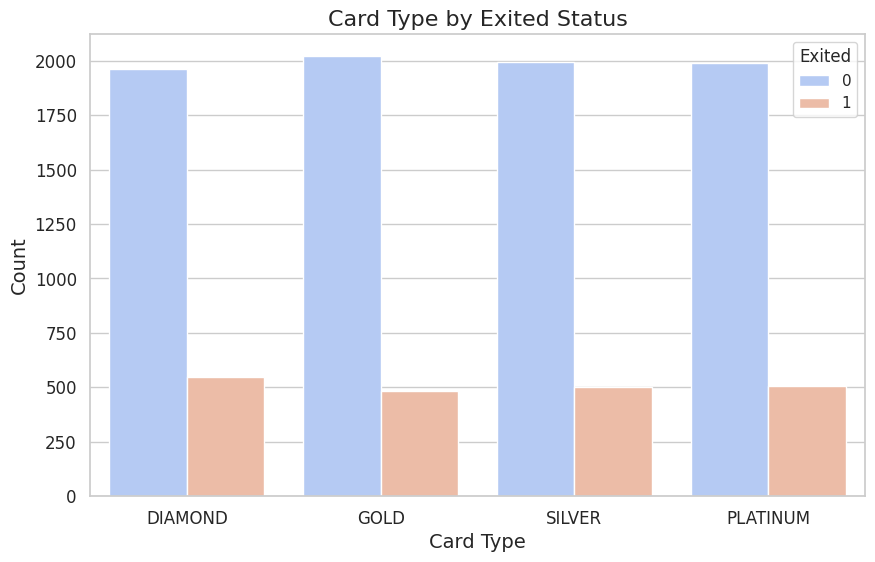

In [53]:
# 13. Card Type vs Exited
plot_countplot('Card Type', 'Exited', 'Card Type by Exited Status', 'Card Type', 'Count')

